Math 5750/6880: Mathematics of Data Science \
Project 4

# 1. Exploratory Analysis

Use the following code to download the dataset from
[https://www.kaggle.com/code/mineshjethva/eda-pulsedb/notebook](https://www.kaggle.com/code/mineshjethva/eda-pulsedb/notebook). The dataset is described in the paper [https://doi.org/10.3389/fdgth.2022.1090854](https://doi.org/10.3389/fdgth.2022.1090854).

I would recommend saving the data files to a google drive (or your local machine) so that you don't have to download them again. Note that the 5 data files correspond to the 5 columns in Table 4 of the paper.


In [1]:
# download the data from kagglehub
# The dataset is 17.3 G
# This took about 15min using university wifi and, if
# you save the data, you should only have to do it once

import kagglehub
path = kagglehub.dataset_download("weinanwangrutgers/pulsedb-balanced-training-and-testing")
print("Path to dataset files:", path)

100%|██████████| 17.3G/17.3G [13:38<00:00, 22.7MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/weinanwangrutgers/pulsedb-balanced-training-and-testing/versions/4


In [2]:
# run this block to move the data to a permanent directory in your drive

import os, glob
from google.colab import drive
drive.mount('/content/drive')
DATA_DIR = "/content/drive/MyDrive/pulsedb/"
!mkdir -p $DATA_DIR
!cp -r $path/* $DATA_DIR

Mounted at /content/drive


In [3]:
# run this block after data is saved to your drive

import os, glob
from google.colab import drive
drive.mount('/content/drive')
DATA_DIR = "/content/drive/MyDrive/pulsedb/"

mat_files = sorted(glob.glob(os.path.join(DATA_DIR, "**", "*.mat"), recursive=True))
print(f"Found {len(mat_files)} .mat files")
for f in mat_files:
    print(" -", f)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Found 5 .mat files
 - /content/drive/MyDrive/pulsedb/VitalDB_AAMI_Cal_Subset.mat
 - /content/drive/MyDrive/pulsedb/VitalDB_AAMI_Test_Subset.mat
 - /content/drive/MyDrive/pulsedb/VitalDB_CalBased_Test_Subset.mat
 - /content/drive/MyDrive/pulsedb/VitalDB_CalFree_Test_Subset.mat
 - /content/drive/MyDrive/pulsedb/VitalDB_Train_Subset.mat


Now we'll load the data. The data is about 20GB, which exceeds the colab basic RAM allocation. You can check your RAM using

`!cat /proc/meminfo`

You should upgrade to colab pro, which is free for students.

[https://colab.research.google.com/signup](https://colab.research.google.com/signup)

Then in 'change runtime type' click A100 GPU and high RAM.

In [5]:
# load the data
# the subject information is stored in a pandas df
# the Signals (ECG, PPG, ABP) are stored in numpy arrays
# this block takes 11 minutes to execute

!cat /proc/meminfo

!pip install mat73
import mat73
import pandas as pd
import numpy as np

def load_mat_file(file_path):
    data_dict = mat73.loadmat(file_path)['Subset']
    print('finished loading'+file_path)
    # print(data_dict.keys())

    # first handle Signals
    ECG = data_dict['Signals'][:,0,:]
    PPG = data_dict['Signals'][:,1,:]
    ABP = data_dict['Signals'][:,2,:]
    data_dict.pop("Signals", None)

    data_dict['Age'] = data_dict['Age'].tolist()
    data_dict['BMI'] = data_dict['BMI'].tolist()
    data_dict['DBP'] = data_dict['DBP'].tolist()
    data_dict['Gender'] = [1 if x[0] == 'M' else 0 for x in data_dict['Gender']]
    data_dict['Height'] = data_dict['Height'].tolist()
    data_dict['SBP'] = data_dict['SBP'].tolist()
    data_dict['Subject'] = [x[0] for x in data_dict['Subject']]
    data_dict['Weight'] = data_dict['Weight'].tolist()

    data_df = pd.DataFrame(data_dict)
    print('constructed df')

    return data_df, ECG, PPG, ABP

df_CalBased_Test, ECG_CalBased_Test, PPG_CalBased_Test, ABP_CalBased_Test = load_mat_file(DATA_DIR+'VitalDB_CalBased_Test_Subset.mat')
df_Train, ECG_Train, PPG_Train, ABP_Train = load_mat_file(DATA_DIR+'VitalDB_Train_Subset.mat')

MemTotal:       175166496 kB
MemFree:        68490524 kB
MemAvailable:   169300196 kB
Buffers:          211408 kB
Cached:         99324768 kB
SwapCached:            0 kB
Active:         17801232 kB
Inactive:       85230776 kB
Active(anon):       1484 kB
Inactive(anon):  3496348 kB
Active(file):   17799748 kB
Inactive(file): 81734428 kB
Unevictable:          20 kB
Mlocked:              20 kB
SwapTotal:             0 kB
SwapFree:              0 kB
Dirty:               448 kB
Writeback:             0 kB
AnonPages:       3486172 kB
Mapped:           536420 kB
Shmem:              1988 kB
KReclaimable:    2871216 kB
Slab:            3258036 kB
SReclaimable:    2871216 kB
SUnreclaim:       386820 kB
KernelStack:       10552 kB
PageTables:        19036 kB
SecPageTables:         0 kB
NFS_Unstable:          0 kB
Bounce:                0 kB
WritebackTmp:          0 kB
CommitLimit:    87583248 kB
Committed_AS:    8051616 kB
VmallocTotal:   34359738367 kB
VmallocUsed:      103472 kB
VmallocChunk:  

In [6]:
# df_CalBased_Test has 51720 entries
print(df_CalBased_Test.keys())
print(df_CalBased_Test.info())
print(df_CalBased_Test.describe())
df_CalBased_Test

Index(['Age', 'BMI', 'DBP', 'Gender', 'Height', 'SBP', 'Subject', 'Weight'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51720 entries, 0 to 51719
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Age      51720 non-null  float64
 1   BMI      51720 non-null  float64
 2   DBP      51720 non-null  float64
 3   Gender   51720 non-null  int64  
 4   Height   51720 non-null  float64
 5   SBP      51720 non-null  float64
 6   Subject  51720 non-null  object 
 7   Weight   51720 non-null  float64
dtypes: float64(6), int64(1), object(1)
memory usage: 3.2+ MB
None
                Age           BMI           DBP        Gender        Height  \
count  51720.000000  51720.000000  51720.000000  51720.000000  51720.000000   
mean      58.980684     22.918826     62.936572      0.576953    162.502790   
std       15.032644      3.437789     12.070353      0.494048      9.641087   
min        0.400000     12.400000   

,Age,BMI,DBP,Gender,Height,SBP,Subject,Weight
0,48.0,20.7,68.482123,1,177.4,116.804871,p000001_1,65.0
1,48.0,20.7,66.047147,1,177.4,113.288819,p000001_1,65.0
2,48.0,20.7,66.378229,1,177.4,113.340180,p000001_1,65.0
3,48.0,20.7,59.910707,1,177.4,95.062698,p000001_1,65.0
4,48.0,20.7,89.850848,1,177.4,140.302555,p000001_1,65.0
...,...,...,...,...,...,...,...,...
51715,79.0,22.1,48.225986,1,169.6,109.266631,p006090_1,63.5
51716,79.0,22.1,48.607110,1,169.6,108.695099,p006090_1,63.5
51717,79.0,22.1,55.178004,1,169.6,110.514411,p006090_1,63.5
51718,79.0,22.1,47.861650,1,169.6,104.640197,p006090_1,63.5


In [7]:
# 1293 subjects, 40 samples/ subject = 51720 samples
df_CalBased_Test['Subject'].value_counts()

,count
Subject,
p006090_1,40
p000001_1,40
p000003_1,40
p000005_1,40
p000012_1,40
...,...
p000063_1,40
p000064_1,40
p000074_1,40


=== Training Set Summary ===
                 Age            BMI            DBP         Gender  \
count  465480.000000  465480.000000  465480.000000  465480.000000   
mean       58.980983      22.918767      62.915730       0.576953   
std        15.032404       3.437773      12.084088       0.494043   
min         0.400000      12.400000      16.226861       0.000000   
25%        51.000000      20.700000      54.445346       0.000000   
50%        61.000000      22.800000      62.174959       1.000000   
75%        70.000000      25.000000      70.523158       1.000000   
max        92.000000      40.300000     276.927879       1.000000   

              Height            SBP         Weight  
count  465480.000000  465480.000000  465480.000000  
mean      162.502705     115.476681      60.823895  
std         9.641188      18.933862      11.659300  
min        54.000000      38.507506       4.800000  
25%       156.600000     102.080878      53.100000  
50%       162.900000     113.99

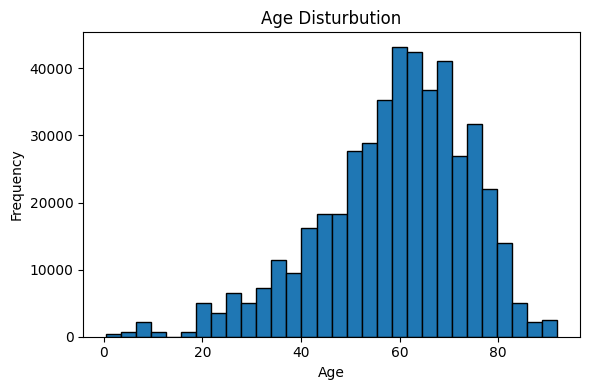

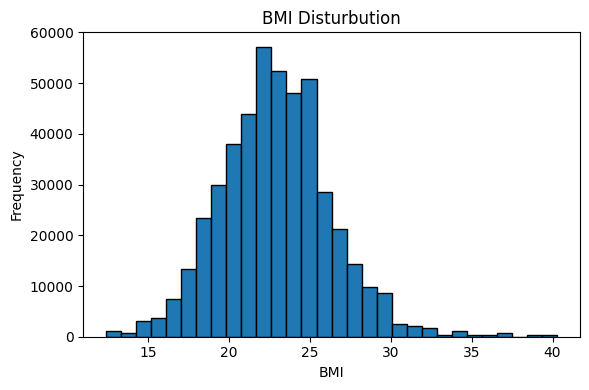

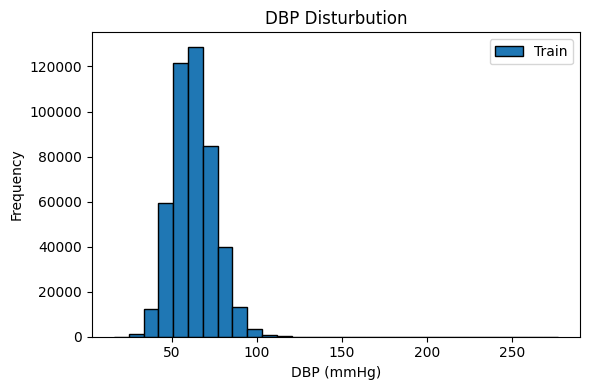

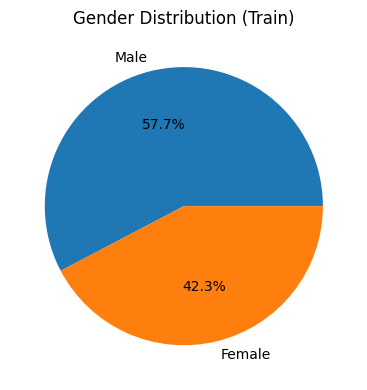

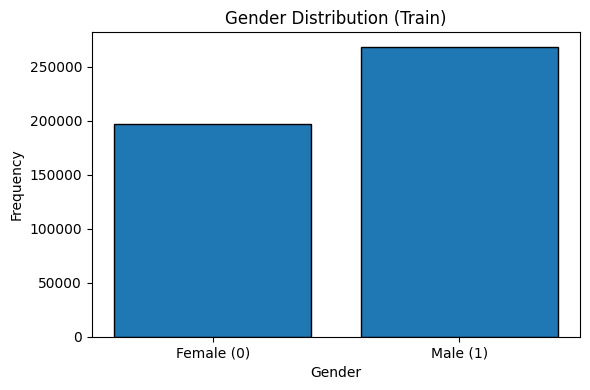

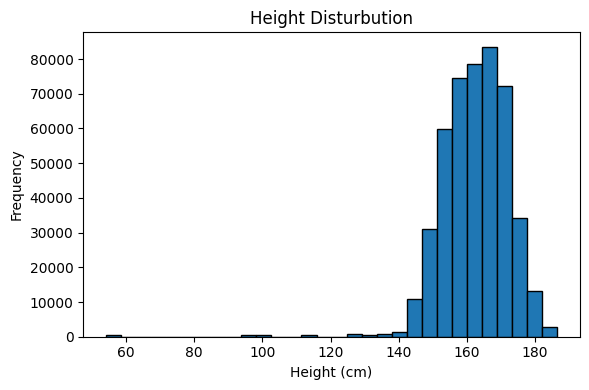

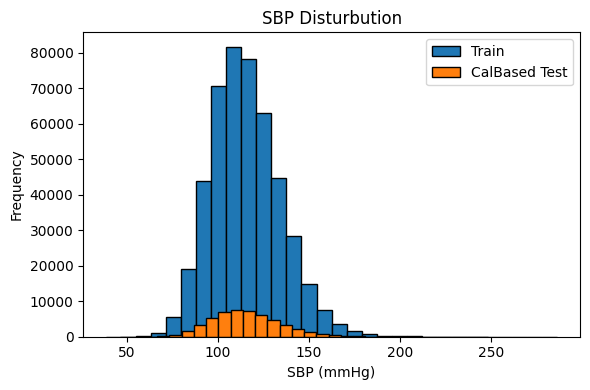

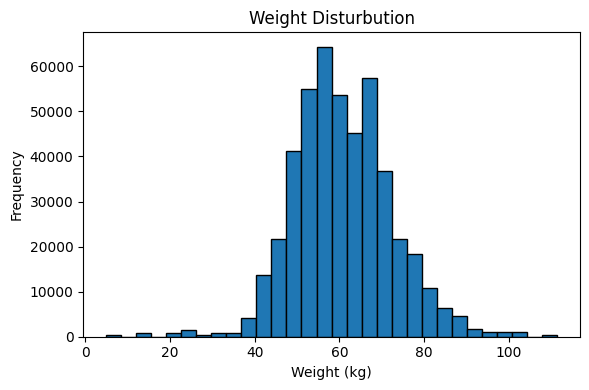

In [21]:
# your code here
import matplotlib.pyplot as plt

# summary statistics

print("=== Training Set Summary ===")
print(df_Train.describe())

print("\n=== CalBased Test Set Summary ===")
print(df_CalBased_Test.describe())

# draw the plots for all datas

plt.rcParams['figure.figsize'] = (6, 4) # unify the size of plots

#Age
plt.figure()
plt.hist(df_Train['Age'], bins = 30, edgecolor = 'black')
plt.title('Age Disturbution')
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.tight_layout()

#BMI
plt.figure()
plt.hist(df_Train['BMI'], bins = 30, edgecolor = 'black')
plt.title('BMI Disturbution')
plt.xlabel("BMI")
plt.ylabel("Frequency")
plt.tight_layout()

# DBP
plt.figure()
plt.hist(df_Train['DBP'], bins = 30, edgecolor = 'black', label = 'Train')
plt.title('DBP Disturbution')
plt.xlabel("DBP (mmHg)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.legend() # color

# Gender （pie chart)
plt.figure()
plt.hist(df_Train['Gender'], bins=[-0.5, 0.5, 1.5], rwidth=0.8, edgecolor='black')
plt.xticks([0, 1], ['Female (0)', 'Male (1)'])
plt.title("Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

# Height
plt.figure()
plt.hist(df_Train['Height'], bins = 30, edgecolor = 'black')
plt.title('Height Disturbution')
plt.xlabel("Height (cm)")
plt.ylabel("Frequency")
plt.tight_layout()

# SBP
plt.figure()
plt.hist(df_Train['SBP'], bins = 30, edgecolor = 'black', label = 'Train')
plt.hist(df_CalBased_Test['SBP'], bins = 30, edgecolor = 'black', label = "CalBased Test")
plt.title('SBP Disturbution')
plt.xlabel("SBP (mmHg)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.legend()

# Weight
plt.figure()
plt.hist(df_Train['Weight'], bins = 30, edgecolor = 'black')
plt.title('Weight Disturbution')
plt.xlabel("Weight (kg)")
plt.ylabel("Frequency")
plt.tight_layout()

# draw the plots for ABP, ECG, PPG

# ABP

# ECG

# PPG

plt.show()



#2. Blood Pressure Prediction


In [ ]:
# your code here

#3. Generative Modeling

In [ ]:
# your code here